## Content list
#### Import libraries and data
#### Wrangling, Cleaning, and Create subset
#### Decomposition
#### Test for stationarity
#### Check for autocorrelations

## 1.Import libraries and data

In [451]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [452]:
# Corrected path 
path = r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency\02 Data\Original Data" 

# Read the CSV file
df=data = pd.read_csv(os.path.join(path, "oil prices.csv")) 

print(data.head()) 

  energy    code country        date      value  notes
0    OIL  CRCSBK     ARE  2002-01-31  7596.0000      3
1    OIL  CRCSKB     ARE  2002-01-31          0      3
2    OIL  CRCSKD     ARE  2002-01-31          x      3
3    OIL  CRCSKL     ARE  2002-01-31          0      3
4    OIL  CRCSKT     ARE  2002-01-31          0      3


In [453]:
data.shape

(20793561, 6)

In [454]:
data.columns

Index(['energy', 'code', 'country', 'date', 'value', 'notes'], dtype='object')

In [455]:
data.head()

,energy,code,country,date,value,notes
0,OIL,CRCSBK,ARE,2002-01-31,7596.0000,3
1,OIL,CRCSKB,ARE,2002-01-31,0,3
2,OIL,CRCSKD,ARE,2002-01-31,x,3
3,OIL,CRCSKL,ARE,2002-01-31,0,3
4,OIL,CRCSKT,ARE,2002-01-31,0,3


In [456]:
type(data)

pandas.core.frame.DataFrame

## 2. Wrangling, Cleaning, Creating Subset

In [482]:
# Display the unique country codes in the 'country' column
unique_country_codes = data['country'].unique()

# Print the unique country codes
print(unique_country_codes)


['ARE' 'ALB' 'ARM' 'AGO' 'ARG' 'AUT' 'AUS' 'AZE' 'BRB' 'BGD' 'BEL' 'BGR'
 'BHR' 'BMU' 'BRN' 'BOL' 'BRA' 'BLR' 'BLZ' 'CAN' 'CHE' 'CHL' 'CHN' 'COL'
 'CRI' 'CUB' 'CYP' 'CZE' 'DEU' 'DNK' 'DOM' 'DZA' 'ECU' 'EST' 'EGY' 'ESP'
 'FIN' 'FRA' 'GAB' 'GBR' 'GRD' 'GEO' 'GMB' 'GNQ' 'GRC' 'GTM' 'GUY' 'HKG'
 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IRL' 'IND' 'IRQ' 'IRN' 'ISL' 'ITA' 'JAM'
 'JPN' 'KOR' 'KWT' 'KAZ' 'LTU' 'LUX' 'LVA' 'LBY' 'MAR' 'MDA' 'MKD' 'MMR'
 'MLT' 'MUS' 'MEX' 'MYS' 'NER' 'NGA' 'NIC' 'NLD' 'NOR' 'NPL' 'NZL' 'OMN'
 'PAN' 'PER' 'PNG' 'PHL' 'POL' 'PRT' 'PRY' 'QAT' 'ROU' 'RUS' 'SAU' 'SDN'
 'SWE' 'SGP' 'SVN' 'SVK' 'SUR' 'SLV' 'SYR' 'SWZ' 'THA' 'TJK' 'TUN' 'TUR'
 'TTO' 'TWN' 'UKR' 'USA' 'URY' 'VEN' 'VNM' 'YEM' 'ZAF']


In [484]:
# Filter the data to include only rows where 'country' is 'DEU' and 'energy' is 'OIL'
filtered_df = sub_df[(sub_df['country'] == 'DEU') & (sub_df['energy'] == 'OIL')]

# Display the filtered data
print(filtered_df)


        energy    code country       date        value  notes
1498800    OIL  CRCSBK     DEU 2002-01-31    7370.0000      3
1498801    OIL  CRCSKB     DEU 2002-01-31  112805.2200      1
1498802    OIL  CRCSKD     DEU 2002-01-31          NaN      1
1498803    OIL  CRCSKL     DEU 2002-01-31   17934.6275      1
1498804    OIL  CRCSKT     DEU 2002-01-31   15306.0000      1
...        ...     ...     ...        ...          ...    ...
9809195    OIL  TPIMBK     DEU 2024-10-31    7430.0000      3
9809196    OIL  TPIMKB     DEU 2024-10-31   20558.0000      2
9809197    OIL  TPIMKD     DEU 2024-10-31     663.0000      2
9809198    OIL  TPIMKL     DEU 2024-10-31    3268.0000      2
9809199    OIL  TPIMKT     DEU 2024-10-31    2571.0000      2

[178100 rows x 6 columns]


In [486]:
filtered_df.head()

,energy,code,country,date,value,notes
1498800,OIL,CRCSBK,DEU,2002-01-31,7370.0000,3
1498801,OIL,CRCSKB,DEU,2002-01-31,112805.2200,1
1498802,OIL,CRCSKD,DEU,2002-01-31,NaN,1
1498803,OIL,CRCSKL,DEU,2002-01-31,17934.6275,1
1498804,OIL,CRCSKT,DEU,2002-01-31,15306.0000,1


In [488]:
filtered_df.shape

(178100, 6)

In [490]:
# Check for missing values in each column
missing_values = filtered_df.isnull().sum()

# Display the missing values
print(missing_values)


energy         0
code           0
country        0
date           0
value      43076
notes          0
dtype: int64


#### 24% of the value is missing. Therefore instead of deleting them, I will use the mean.

In [495]:
# Impute missing values with the mean
mean_value = filtered_df['value'].mean()
filtered_df['value'] = filtered_df['value'].fillna(mean_value)


In [499]:
# Check for missing values in each column again!
missing_values = filtered_df.isnull().sum()

# Display the missing values
print(missing_values)


energy     0
code       0
country    0
date       0
value      0
notes      0
dtype: int64


In [462]:
filtered_df.to_csv(r"C:\Users\TN1\Desktop\career foundry\2 Data Immersion\6\DE vehicle price efficiency\02 Data\Prepared Data\Filteredoil_data.csv", index=False)


In [503]:
# Drop duplicate rows
filtered_df = filtered_df.drop_duplicates()


In [505]:
# Convert a column to datetime
filtered_df['date'] = pd.to_datetime(df['date'])

# Convert a column to numeric
filtered_df['value'] = pd.to_numeric(df['value'], errors='coerce')


In [511]:
# Create a subset with the desired columns
df_sub = filtered_df[['date', 'value']]

In [513]:
# Group by date with the mean of the avg delay
df_sub = filtered_df.groupby('date')['value'].mean()

In [515]:
df_sub.head()

date
2002-01-31    7788.892856
2002-02-28    7457.381644
2002-03-31    7782.080755
2002-04-30    7619.657861
2002-05-31    7479.090166
Name: value, dtype: float64

In [517]:
# Turn df_sub into data frame
df_sub = df_sub.reset_index()
df_sub

,date,value
0,2002-01-31,7788.892856
1,2002-02-28,7457.381644
2,2002-03-31,7782.080755
3,2002-04-30,7619.657861
4,2002-05-31,7479.090166
...,...,...
269,2024-06-30,3996.852013
270,2024-07-31,4005.262572
271,2024-08-31,4018.429780
272,2024-09-30,3877.753053


In [523]:
df_sub['datetime'] = pd.to_datetime(df_sub['date']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,value
datetime,
2002-01-31,7788.892856
2002-02-28,7457.381644
2002-03-31,7782.080755
2002-04-30,7619.657861
2002-05-31,7479.090166


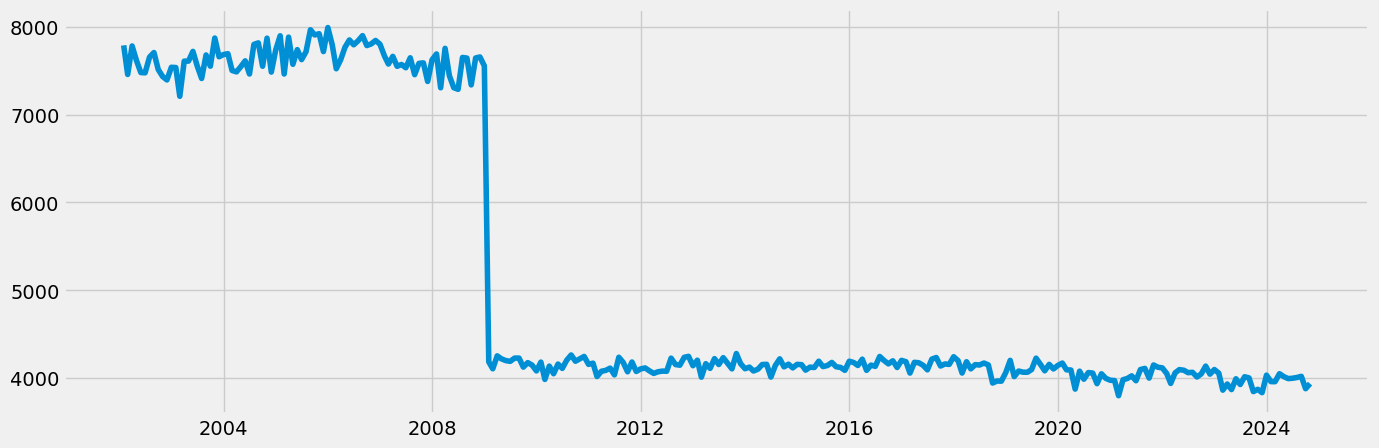

In [525]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [527]:
# Check for missing values
df_sub.isnull().sum() 

value    0
dtype: int64

In [529]:
# Check for duplicates
dups = df_sub.duplicated()
dups.sum()
# No dups

0

### Commentation
#### It looks like there's a big fall in the oil price in germany between 2010 and 20011.After that is seems more stable. Lets check in detail. However, we should never forget our data's 24% was missing and we used the mean to compensate the missing values.

## 3.Decomposition

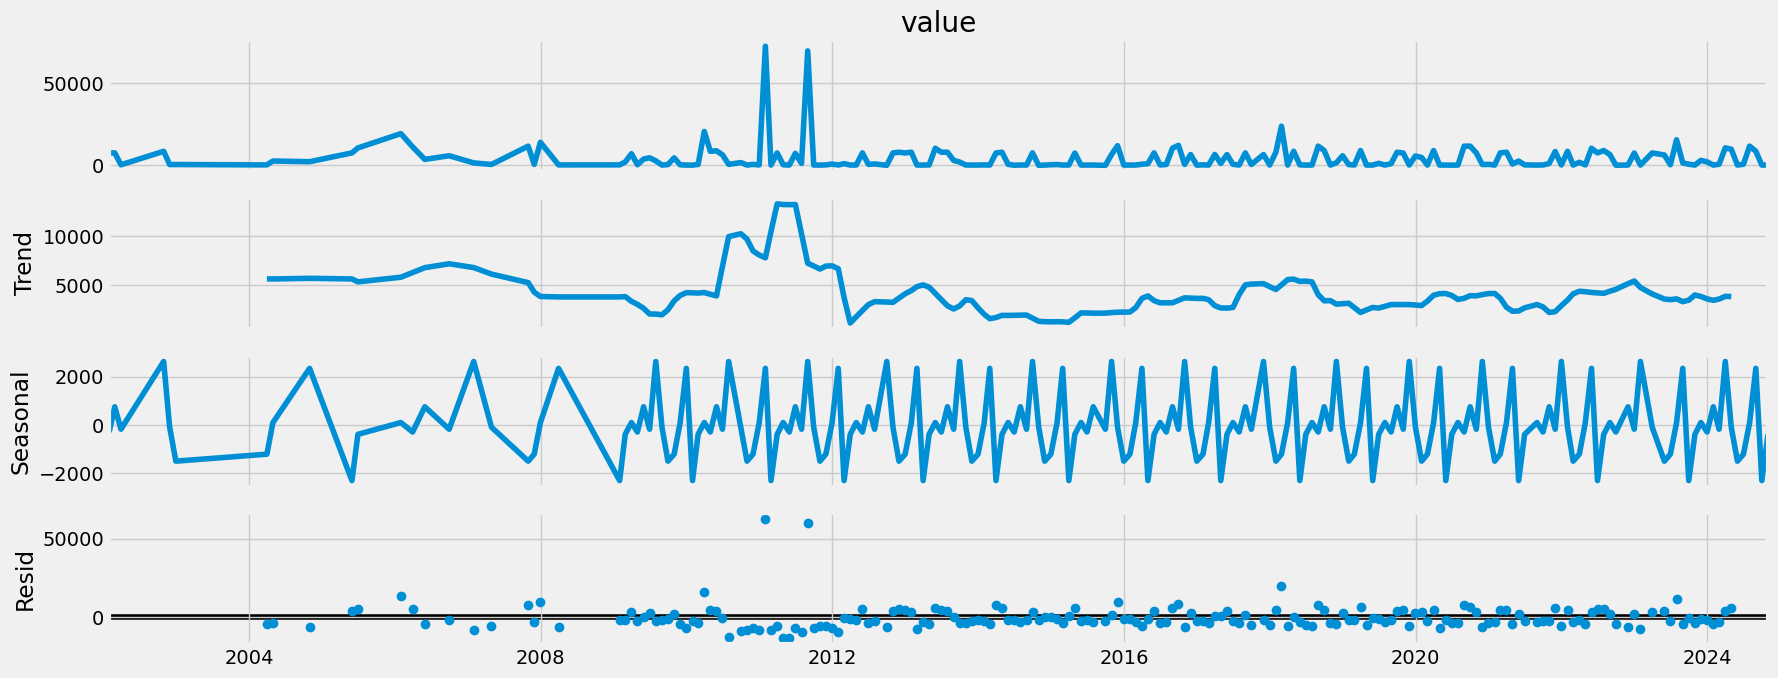

In [545]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7
# Plot the separate components
decomposition.plot()
plt.show()

### Insights

The first chart is the level. This is just the data itself including all its components.

The second chart is the trend. There is a sudden increase in 2009 untill 2011 and then there was a rapid fall and continous stability. The trend line compared to the level are very similar.

The third chart is the seasonality. There is seasonality in this data.

The 4th chart is the noise or "residual'. There are gaps between 2004 up untill 2009. Other than that there isn't much unexplained noise and there stability.

Given the presence of both an upward and downward trend and no seasonality, this data is considered non-stationary. We will conduct a statistical test to confirm this.

## 4.Stationary

In [550]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.419122
p-value                          0.573075
Number of Lags Used              1.000000
Number of Observations Used    272.000000
Critical Value (1%)             -3.454622
Critical Value (5%)             -2.872225
Critical Value (10%)            -2.572464
dtype: float64


### Interpretation
#### Our Test Statistic, -1.419122, is larger than the 10%, 5%, and 1% critical values, which means that we cannot reject the null hypothesis (which is: the data is not stationary). This suggests that the time series is likely non-stationary. Additionally, our p-value of 0.573075 is greater than 0.05, indicating that the result is not statistically significant. Therefore, we cannot consider the series stationary based on these results.


## 5.Check for autocorrelations

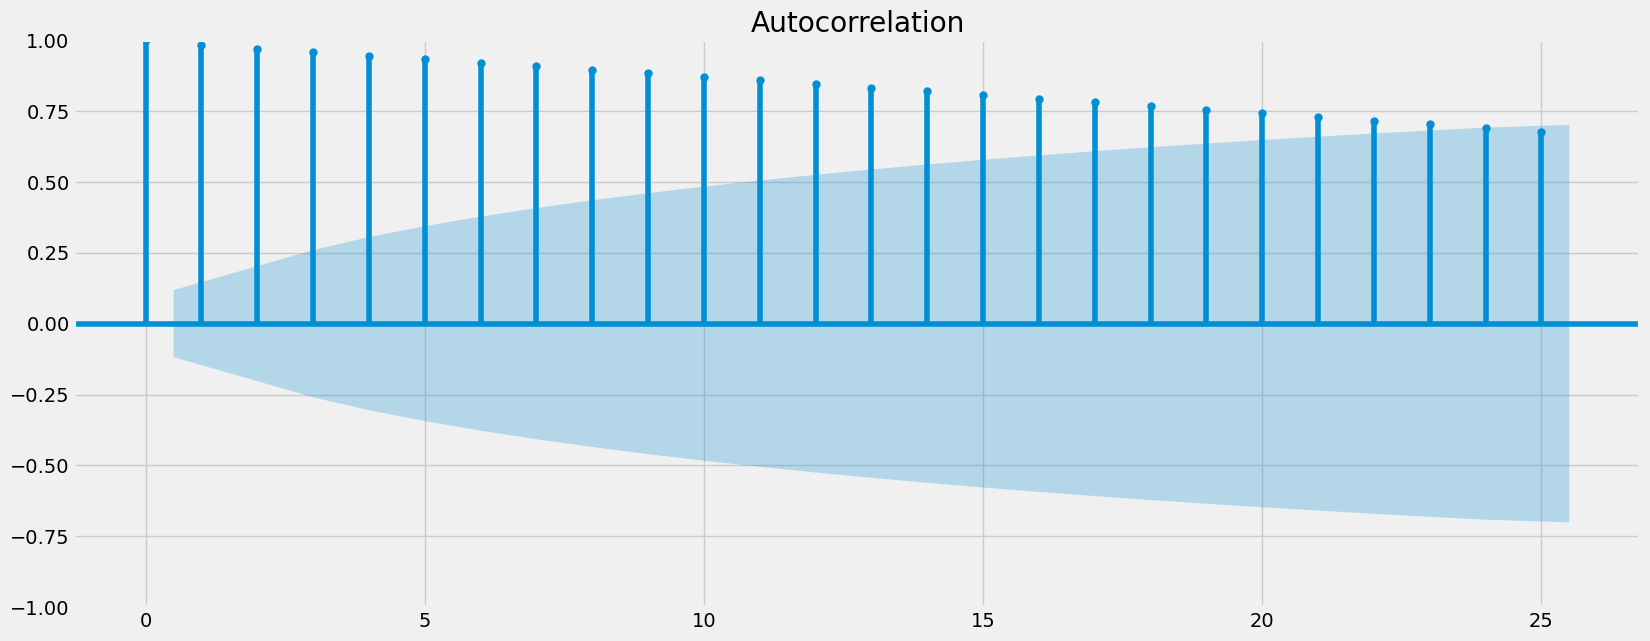

In [555]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub)
plt.show()

### Interpretation
#### The autocorrelation plot shows 26 lags, with the first lag (lag 0) not being shaded, indicating it's the baseline (correlation with itself). The remaining 25 lags are shaded, indicating they are under the significance threshold. This suggests that the autocorrelations at these lags are statistically significant, meaning that the time series exhibits some level of correlation at these lags.

#### The highest correlation value observed is around 1, which is expected for lag 0, and the shortest correlation value is around 0.73. This indicates that, while the time series shows a strong correlation at the first few lags, the autocorrelations gradually decrease as we move further out in time. The gradual decrease could suggest that there is some short-term persistence or structure in the data, but the autocorrelations drop off significantly after the first few lags, indicating that long-term dependencies in the series are weak.

#### Overall, this autocorrelation pattern could imply that the time series has some level of short-term memory or predictability, but it does not exhibit strong long-term autocorrelation.
#### This data due to its missing values for Germany around 24%, are replaced by the mean of the values. Therefore, it may not show the real correlation and forecasting.